In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data=pd.read_csv(r"D:\DecisionTree--main\DecisionTree--main\Social_Network_Ads.csv")

In [3]:
data.head(1)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0


In [4]:
pd.crosstab(data["Purchased"],data["Purchased"],normalize='all')*100

Purchased,0,1
Purchased,,
0,64.25,0.00
1,0.00,35.75


In [5]:
data_feature=data.drop("User ID",axis=1)

In [6]:
data_feature.head(1)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0


In [7]:
data_feature["Gender"]=data_feature["Gender"].map({"Male":1,"Female":0})

In [8]:
data_feature.head(1)

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0


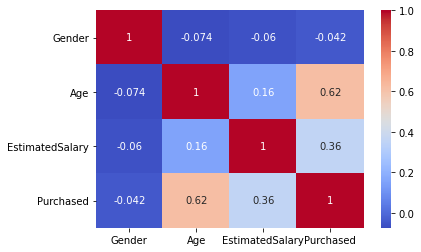

In [9]:
sb.heatmap(data_feature.corr(),cmap="coolwarm",annot=True)
plt.show()

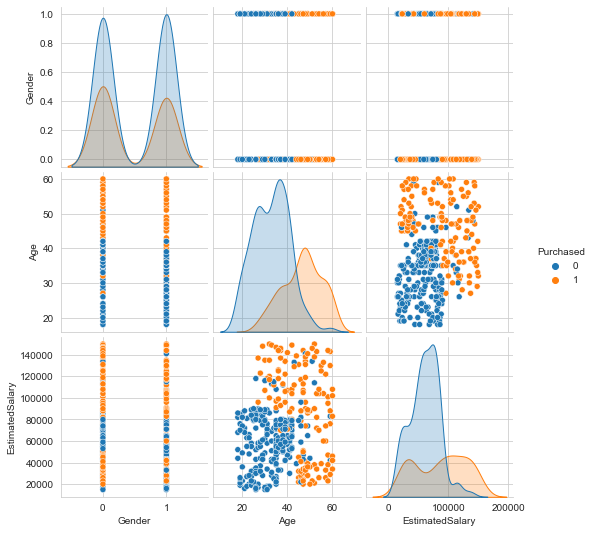

In [10]:
sb.set_style('whitegrid')
sb.pairplot(data_feature,hue="Purchased")
plt.show()

In [11]:
data_feature.head(1)

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0


In [12]:
XFeature=data_feature.drop('Purchased',axis=1)
Ytarget=data_feature["Purchased"]

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import time

In [14]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(XFeature,Ytarget,test_size=.30,random_state=101)

# KNN

In [15]:
s1=time.time()
KnnModel =KNeighborsClassifier().fit(Xtrain,Ytrain)
s2=time.time()
knn_tt=s2-s1
print(f"time taken by knn testing is {knn_tt}")

time taken by knn testing is 0.0


In [16]:
Ya=Ytest
s1=time.time()
Yp=KnnModel.predict(Xtest)
s2=time.time()
knn_ts=s2-s1
print(f"time taken by knn testing is {knn_ts}")

time taken by knn testing is 0.01600360870361328


In [17]:
acc_knn=accuracy_score(Ya,Yp)*100
print(f"accuracy of knn is {acc_knn}")

accuracy of knn is 80.0


In [18]:
cm_knn=confusion_matrix(Ya,Yp)
print(cm_knn)

[[65 15]
 [ 9 31]]


In [19]:
print(classification_report(Ya,Yp))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        80
           1       0.67      0.78      0.72        40

    accuracy                           0.80       120
   macro avg       0.78      0.79      0.78       120
weighted avg       0.81      0.80      0.80       120



# logistic regression

In [20]:
s1=time.time()
LRModel =LogisticRegression().fit(Xtrain,Ytrain)
s2=time.time()
lr_tt=s2-s1
print(f"time taken by logistics regression testing is {lr_tt}")

time taken by logistics regression testing is 0.00799870491027832


In [21]:
Ya=Ytest
s1=time.time()
Yp=LRModel.predict(Xtest)
s2=time.time()
lr_ts=s2-s1
print(f"time taken by logistics regression testing is {lr_ts}")

time taken by logistics regression testing is 0.0


In [22]:
acc_lr=accuracy_score(Ya,Yp)*100
print(f"accuracy logistic regression is {acc_lr} ")

accuracy logistic regression is 66.66666666666666 


# naive bayes


In [23]:
s1=time.time()
NBModel =MultinomialNB().fit(Xtrain,Ytrain)
s2=time.time()
NB_tt=s2-s1
print(f"time taken by naive bayes testing is {NB_tt}")

time taken by naive bayes testing is 0.0


In [24]:
Ya=Ytest
s1=time.time()
Yp=NBModel.predict(Xtest)
s2=time.time()
NB_ts=s2-s1
print(f"time taken by vaive bayes testing is {NB_ts}")

time taken by vaive bayes testing is 0.031882524490356445


In [25]:
acc_Nb=accuracy_score(Ya,Yp)*100
print(f"accuracy naive bayes is {acc_Nb} ")

accuracy naive bayes is 70.0 


# decision tree


In [26]:
s1=time.time()
DTModel =DecisionTreeClassifier().fit(Xtrain,Ytrain)
s2=time.time()
DT_tt=s2-s1
print(f"time taken by decision tree testing is {DT_tt}")

time taken by decision tree testing is 0.007999181747436523


In [27]:
Ya=Ytest
s1=time.time()
Yp=DTModel.predict(Xtest)
s2=time.time()
DT_ts=s2-s1
print(f"time taken by Decision tree testing is {DT_ts}")

time taken by Decision tree testing is 0.0


In [28]:
acc_dt=accuracy_score(Ya,Yp)*100
print(f"accuracy of decision tree is {acc_dt} ")

accuracy of decision tree is 90.83333333333333 


In [29]:
tt_time=[knn_tt,lr_tt,NB_tt,DT_tt]
ts_time=[knn_ts,lr_ts,NB_ts,DT_ts]
acc_model=[acc_knn,acc_lr,acc_Nb,acc_dt]
model_name=["KNN","LR","NB","DT"]

In [30]:
table=pd.DataFrame({"TrainingTime":tt_time,
                   "TestingTime":ts_time,
                   "Acc":acc_model},index=model_name)

In [31]:
table

,TrainingTime,TestingTime,Acc
KNN,0.000000,0.016004,80.000000
LR,0.007999,0.000000,66.666667
NB,0.000000,0.031883,70.000000
DT,0.007999,0.000000,90.833333


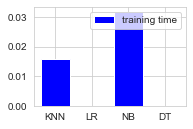

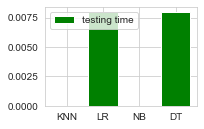

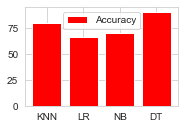

In [35]:

plt.subplot(2,2,1)
plt.bar(model_name,ts_time,label="training time",color="blue")
plt.legend()
plt.show()

plt.subplot(2,2,2)
plt.bar(model_name,tt_time,label="testing time",color="green")
plt.legend()
plt.show()


plt.subplot(2,2,3)
plt.bar(model_name,acc_model,label="Accuracy",color="red")
plt.legend()
plt.show()


# visualizing the tree

In [36]:
data_feature.columns.tolist()


['Gender', 'Age', 'EstimatedSalary', 'Purchased']

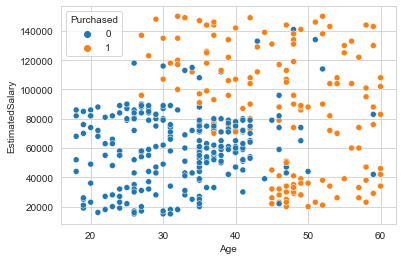

In [37]:
sb.scatterplot(x="Age",y="EstimatedSalary",data=data_feature,hue="Purchased")
plt.show()

In [38]:
dtree=DecisionTreeClassifier()
dtree.fit(Xtrain,Ytrain)
Ypdt=dtree.predict(Xtest)

In [39]:
 from sklearn import tree